# SWMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in supervised binary classification, namely accuracy, precision, recall and the $F_1$ score. All are called performance _metrics_, though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time.

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
    \def\rem#1{}
    \rem{MACRO arr: array <#1:columns (lcr..)> <#2:content>}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \rem{MACRO st: subscript text <#1:content>}
    \def\st#1{_{\textrm{#1}}}
    \rem{MACRO boldmatrix: bold matix/vector notation} 
    \def\boldmatrix#1{\mathbf{#1}} 
    \rem{MACROS y: bold y} 
    \def\by{\boldmatrix{y}}
    \def\myfrac#1#2{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}}
\ar{rl}{
  p &= \myfrac{TP}{TP + FP}
}
$$

### Recall or Sensitivity

$$
  \ar{rl}{
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  }
$$

### Accuracy

$$
  \ar{rl}{
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  }\
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ar{rl}{
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  }
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
\def\Mconf{\boldmatrix{M}\st{confusion}}
\Mconf~~~ = 
\ar{l|ll}{
                             & \textrm{actual true} & \textrm{actual false} \\ \hline
    \textrm{predicted true}  & TP & FP \\     
    \textrm{predicted false} & FN & TN 
}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
\Mconf~~~ =
  \left[
  \ar{llll}{
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
 }
 \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/04-Cost-and-Score/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Remember to use the '5/not-5' ground-truth data, ala

```python
    y_train_5 = (y_train == '5')    
    y_test_5  = (y_test == '5')
```

not the full 10 class MNIST output categories, since we are dealing with metrics handling only pure binary classifiers (well, there is a way to deal with this using micro/macro averaging of multiclass classifiers, you meet these in the gridsearch exercise later).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

def MyAccuracy(y_true, y_pred):
    # Ensure inputs are numpy arrays to allow element-wise boolean operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate components
    TP = np.sum((y_pred == True)  & (y_true == True))
    FN = np.sum((y_pred == False) & (y_true == True))
    FP = np.sum((y_pred == True)  & (y_true == False))
    TN = np.sum((y_pred == False) & (y_true == False))
    
    # Handle the zero-division case mentioned in the exercise
    denominator = (TP + FN + FP + TN)
    if denominator == 0:
        return 0.0
        
    acc = (TP + TN) / denominator
    return acc

# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)

   print(f"\nmy a          ={a0}")
   print(f"scikit-learn a={a1}")

def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, cache=True)
    # 'mnist_784': The specific version of MNIST on OpenML.
    # return_X_y=True: Returns (data, target) instead of a dictionary.
    # as_frame=False: Returns data as Numpy arrays (easier for image reshaping).
    # cache=True: Saves data locally to avoid re-downloading.
    
    # Convert labels from str. to int.
    y = y.astype(np.int8)

    return X, y

X, y = MNIST_GetDataSet()
print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

train_index=50000
X_train, X_test, y_train, y_test = X[:train_index], X[train_index:], y[:train_index], y[train_index:]
y_train_5 = (y_train == 5) # Use integer 5
y_test_5  = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Get predictions for the test set
y_pred = sgd_clf.predict(X_test)

TestAccuracy(y_test_5, y_pred)

X.shape=(70000, 784)
X.shape=(70000, 784)

my a          =0.95505
scikit-learn a=0.95505


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [21]:
# Qb
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def MyPrecision(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate components
    TP = np.sum((y_pred == True)  & (y_true == True))
    FN = np.sum((y_pred == False) & (y_true == True))
    FP = np.sum((y_pred == True)  & (y_true == False))
    TN = np.sum((y_pred == False) & (y_true == False))
    
    # Handle the zero-division case
    denominator = (TP + FP)
    if denominator == 0:
        return 0.0
    p = TP / denominator
    return p

def MyRecall(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate components
    TP = np.sum((y_pred == True)  & (y_true == True))
    FN = np.sum((y_pred == False) & (y_true == True))
    FP = np.sum((y_pred == True)  & (y_true == False))
    TN = np.sum((y_pred == False) & (y_true == False))
    
    # Handle the zero-division case
    denominator = (TP + FN)
    if denominator == 0:
        return 0.0
    r = TP / (TP + FN)
    return r

def MyF1Score(y_true, y_pred):
    p=MyPrecision(y_true, y_pred)
    r=MyRecall(y_true, y_pred)
    
    # Handle the zero-division case
    denominator = (p+r)
    if denominator == 0:
        return 0.0
    F1=2*p*r / denominator
    return F1

# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestPrecision(y_true, y_pred):
   p0=MyPrecision(y_true, y_pred)
   p1=precision_score(y_true, y_pred)

   print(f"\nmy p          ={p0}")
   print(f"scikit-learn p={p1}")

def TestRecall(y_true, y_pred):
   r0=MyRecall(y_true, y_pred)
   r1=recall_score(y_true, y_pred)

   print(f"\nmy r          ={r0}")
   print(f"scikit-learn r={r1}")

def TestF1Score(y_true, y_pred):
   F1_0=MyF1Score(y_true, y_pred)
   F1_1=f1_score(y_true, y_pred)

   print(f"\nmy F1          ={F1_0}")
   print(f"scikit-learn F1={F1_1}")

TestPrecision(y_test_5, y_pred)
TestRecall(y_test_5, y_pred)
TestF1Score(y_test_5, y_pred)


my p          =0.7123479887745556
scikit-learn p=0.7123479887745556

my r          =0.8428334255672385
scikit-learn r=0.8428334255672385

my F1          =0.7721166032953105
scikit-learn F1=0.7721166032953105


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [22]:
# Qc
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self # Standard practice to return self
        
    def predict(self, X):
        # Change (len(X), 1) to just (len(X),) to make it 1D
        return np.zeros(len(X), dtype=bool)

# 1. Instantiate
never_5_clf = DummyClassifier()

# 2. Predict
y_never_5_pred = never_5_clf.predict(X_test)

# 3. Generate Matrix
conf_matrix = confusion_matrix(y_test_5, y_never_5_pred)
print("Confusion Matrix for Dummy Classifier:")
print(conf_matrix)



from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

# 1. Instantiate the model
# We set random_state=42 to ensure your results match the HOML textbook 
# and are reproducible across runs.
sgd_clf = SGDClassifier(random_state=42)

# 2. Fit the model
# Note: We fit on X_train and the boolean y_train_5
sgd_clf.fit(X_train, y_train_5)

# 3. Predict on the test set
y_sgd_pred = sgd_clf.predict(X_test)

# 4. Generate Confusion Matrix
M_SGD = confusion_matrix(y_test_5, y_sgd_pred)

print("Confusion Matrix for SGD Classifier:")
print(M_SGD)


Confusion Matrix for Dummy Classifier:
[[18193     0]
 [ 1807     0]]
Confusion Matrix for SGD Classifier:
[[17578   615]
 [  284  1523]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

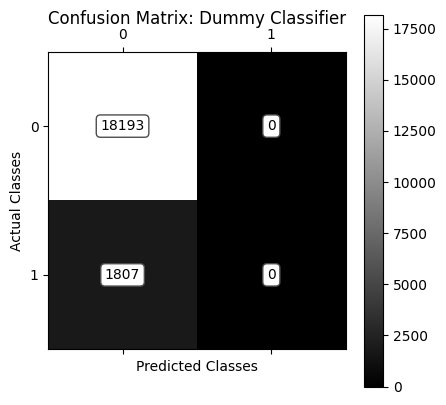

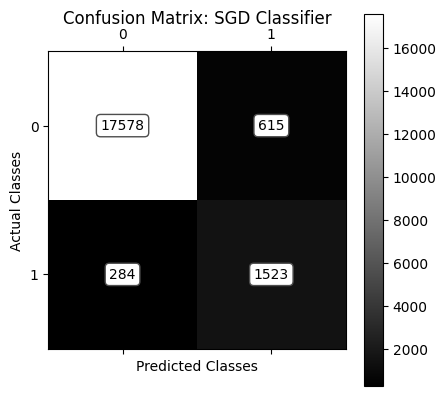

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test_5, y_never_5_pred, and y_sgd_pred are already defined
M_dummy = confusion_matrix(y_test_5, y_never_5_pred)
M_SGD = confusion_matrix(y_test_5, y_sgd_pred)

def plot_confusion_matrix(matrix, title):
    # matshow displays an array as a matrix
    plt.matshow(matrix, cmap=plt.cm.gray) 
    plt.title(title, pad=20)
    plt.colorbar()
    plt.ylabel('Actual Classes')
    plt.xlabel('Predicted Classes')
    
    # Adding text labels for clarity
    for (i, j), z in np.ndenumerate(matrix):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center',
                 bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
    plt.show()

# Plotting both
plot_confusion_matrix(M_dummy, "Confusion Matrix: Dummy Classifier")
plot_confusion_matrix(M_SGD, "Confusion Matrix: SGD Classifier")

### Qe Conclusion

The essence of these exercises lies in dismantling the illusion that Accuracy is a sufficient metric for evaluating machine learning models. By implementing a "Dummy Classifier" that achieves ~90% accuracy while failing to identify a single actual digit '5', we exposed the Accuracy Paradox. This demonstrated why accuracy is dangerously misleading in imbalanced datasets—common in real-world scenarios like medical diagnosis or fraud detection.

Through the manual implementation of MyAccuracy and the generation of Confusion Matrices, we shifted focus from a single percentage to the four fundamental outcomes: TP, TN, FP, and FN. The learning outcome was the realization that a model’s value depends on the balance between Precision (avoiding false alarms) and Recall (avoiding missed detections). Visualizing these via Heat-maps further reinforced how to perform "Error Analysis" to see exactly where a model fails. Ultimately, we learned that selecting the right performance metric is just as critical as the choice of the algorithm itself.

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-07| CEF, updated.
2018-02-07| CEF, rewritten accuracy paradox section.
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 STMAL.
2023-02-07| CEF, update HOML page numbers.
2023-02-09| CEF, chagned y_train to y_test in conf. matrix call.
2023-08-30| CEF, minor table change.
2023-10-02| CEF, changed LaTeX commands to defs to get both KaTeX and MathJax to work.
2023-10-10| CEF, elaborated on binary classifer data (y=='5'), and not using full 10-class MNIST categories.
2026-01-28| CEF, changed image links.